# Airbnb Price Prediction

## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

## Loading Dataset

In [2]:
data=pd.read_csv('AB_NYC_2019.csv')

### Show Dataset

In [3]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Size of Dataset

In [4]:
data.shape

(48895, 16)

### Print the Datatypes of the dataset

In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Count null values in each column

In [8]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop Insignificant Column

In [9]:
data.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
data.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Examining Changes 

In [10]:
data.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Replace null values of 'Reviews per month' by 0

In [11]:
data.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
# data.reviews_per_month.isnull().sum()
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.5+ MB


### Examine Continous Variables

In [14]:
data.describe

<bound method NDFrame.describe of          host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0           2787            Brooklyn          Kensington  40.64749  -73.97237   
1           2845           Manhattan             Midtown  40.75362  -73.98377   
2           4632           Manhattan              Harlem  40.80902  -73.94190   
3           4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4           7192           Manhattan         East Harlem  40.79851  -73.94399   
5           7322           Manhattan         Murray Hill  40.74767  -73.97500   
6           7356            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7           8967           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8           7490           Manhattan     Upper West Side  40.80178  -73.96723   
9           7549           Manhattan           Chinatown  40.71344  -73.99037   
10          7702           Manhattan     Upper West Side  40.80316  -73.965

In [15]:
categorical_columns=[column for column in data.columns if data[column].dtypes=='O']

In [16]:
data[categorical_columns].head()

neighbourhood_group neighbourhood        room_type
0            Brooklyn    Kensington     Private room
1           Manhattan       Midtown  Entire home/apt
2           Manhattan        Harlem     Private room
3            Brooklyn  Clinton Hill  Entire home/apt
4           Manhattan   East Harlem  Entire home/apt

In [17]:
numeric_columns=[column for column in data.columns if column not in categorical_columns]

In [18]:
data[numeric_columns].head()

host_id  latitude  longitude  price  minimum_nights  number_of_reviews  \
0     2787  40.64749  -73.97237    149               1                  9   
1     2845  40.75362  -73.98377    225               1                 45   
2     4632  40.80902  -73.94190    150               3                  0   
3     4869  40.68514  -73.95976     89               1                270   
4     7192  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [19]:
discrete_features=[feature for feature in numeric_columns if len(data[feature].unique())<50]

In [20]:
discrete_features

['calculated_host_listings_count']

In [21]:
continuous_feature=[feature for feature in numeric_columns if feature not in discrete_features]

In [22]:
continuous_feature

['host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365']

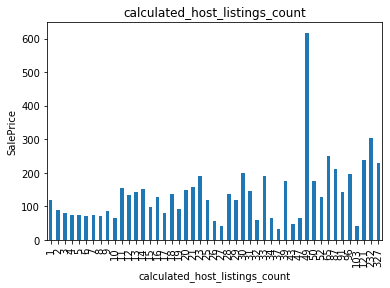

In [23]:
for feature in discrete_features:
    data1=data.copy()
    data1.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

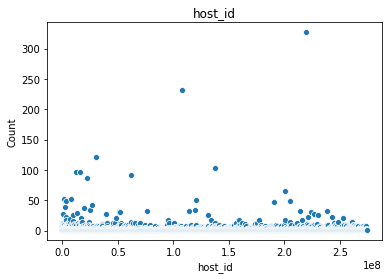

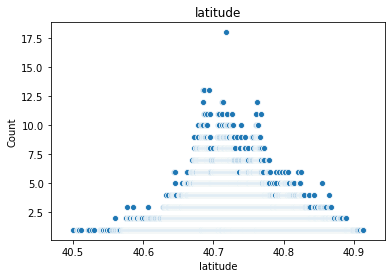

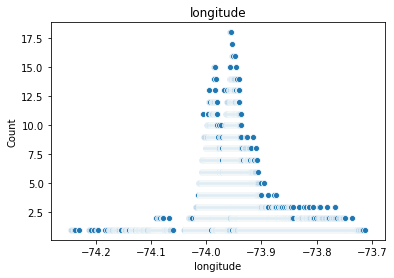

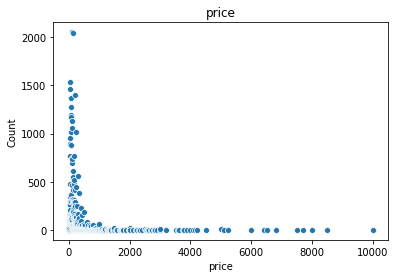

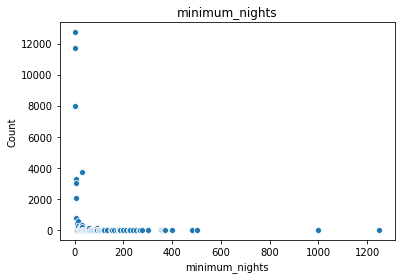

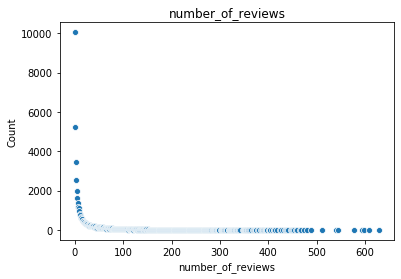

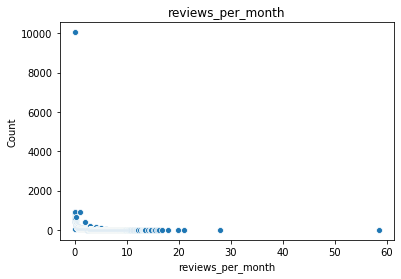

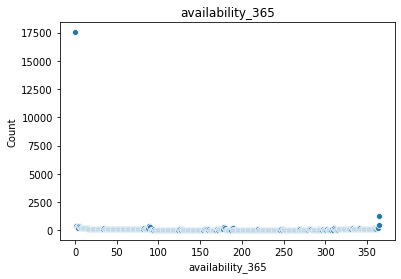

In [24]:
for feature in continuous_feature:
    data1=data.groupby(feature)
    d=data1[feature].count()
    sns.scatterplot(x=d.index,y=d)
#     data1[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


C:\Users\Mukund Rastogi\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


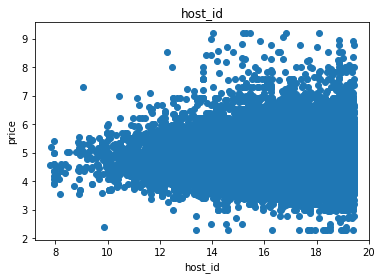

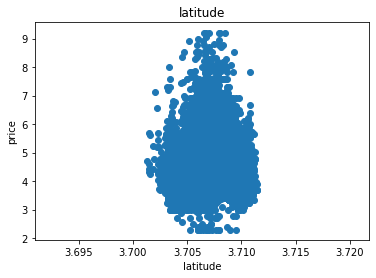

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


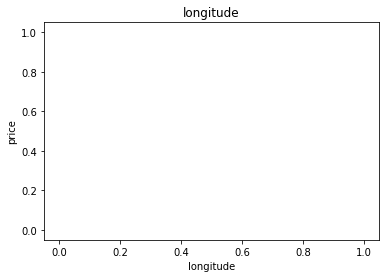

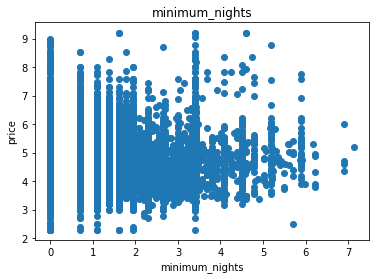

In [25]:
for feature in continuous_feature:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data1['price']=np.log(data1['price'])
        plt.scatter(data1[feature],data1['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()
        

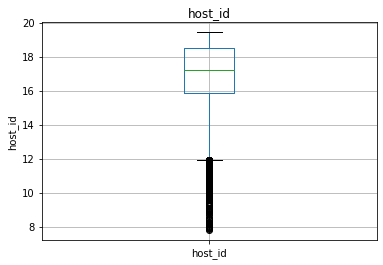

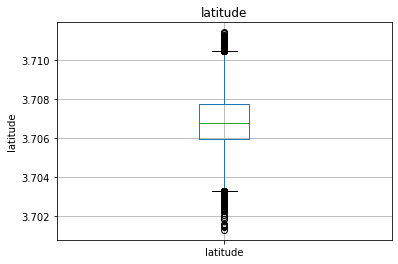

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


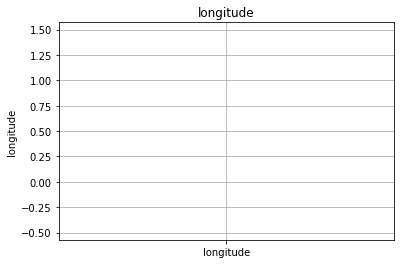

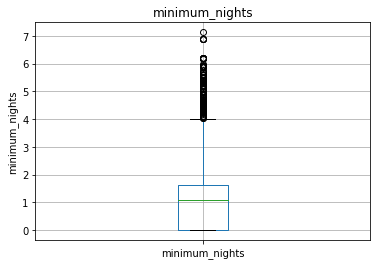

In [26]:
for feature in continuous_feature:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [27]:
for feature in categorical_columns:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is neighbourhood_group and number of categories are 5
The feature is neighbourhood and number of categories are 221
The feature is room_type and number of categories are 3


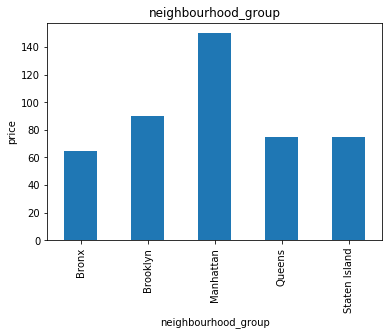

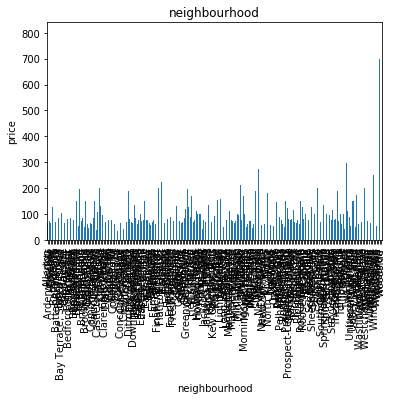

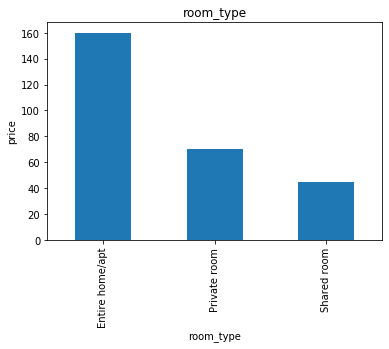

In [28]:
for feature in categorical_columns:
    data1=data.copy()
    data1.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

### Print all the columns names

In [29]:
data.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [30]:
data['neighbourhood_group'].value_counts().to_frame()

neighbourhood_group
Manhattan                    21661
Brooklyn                     20104
Queens                        5666
Bronx                         1091
Staten Island                  373

In [31]:
data['room_type'].value_counts().to_frame()

room_type
Entire home/apt      25409
Private room         22326
Shared room           1160

In [32]:
df_grp1 = data[['neighbourhood_group','price']].groupby(['neighbourhood_group'],as_index=False).mean()
df_grp1=df_grp1.rename(columns={'price':'average_price'})
df_grp1

neighbourhood_group  average_price
0               Bronx      87.496792
1            Brooklyn     124.383207
2           Manhattan     196.875814
3              Queens      99.517649
4       Staten Island     114.812332

In [33]:
df_grp2 = data[['room_type','price']].groupby(['room_type'],as_index=False).mean()
df_grp2=df_grp2.rename(columns={'price':'average_price'})
df_grp2

room_type  average_price
0  Entire home/apt     211.794246
1     Private room      89.780973
2      Shared room      70.127586

In [34]:
df_grp3 = data[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type'],as_index=False).mean()
df_grp3 = df_grp3.rename(columns={'price':'average_price'})
df_pivot = df_grp3.pivot(index='room_type',columns='neighbourhood_group')
df_pivot

average_price                                      \
neighbourhood_group         Bronx    Brooklyn   Manhattan      Queens   
room_type                                                               
Entire home/apt        127.506596  178.327545  249.239109  147.050573   
Private room            66.788344   76.500099  116.776622   71.762456   
Shared room             59.800000   50.527845   88.977083   69.020202   

                                   
neighbourhood_group Staten Island  
room_type                          
Entire home/apt        173.846591  
Private room            62.292553  
Shared room             57.444444

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

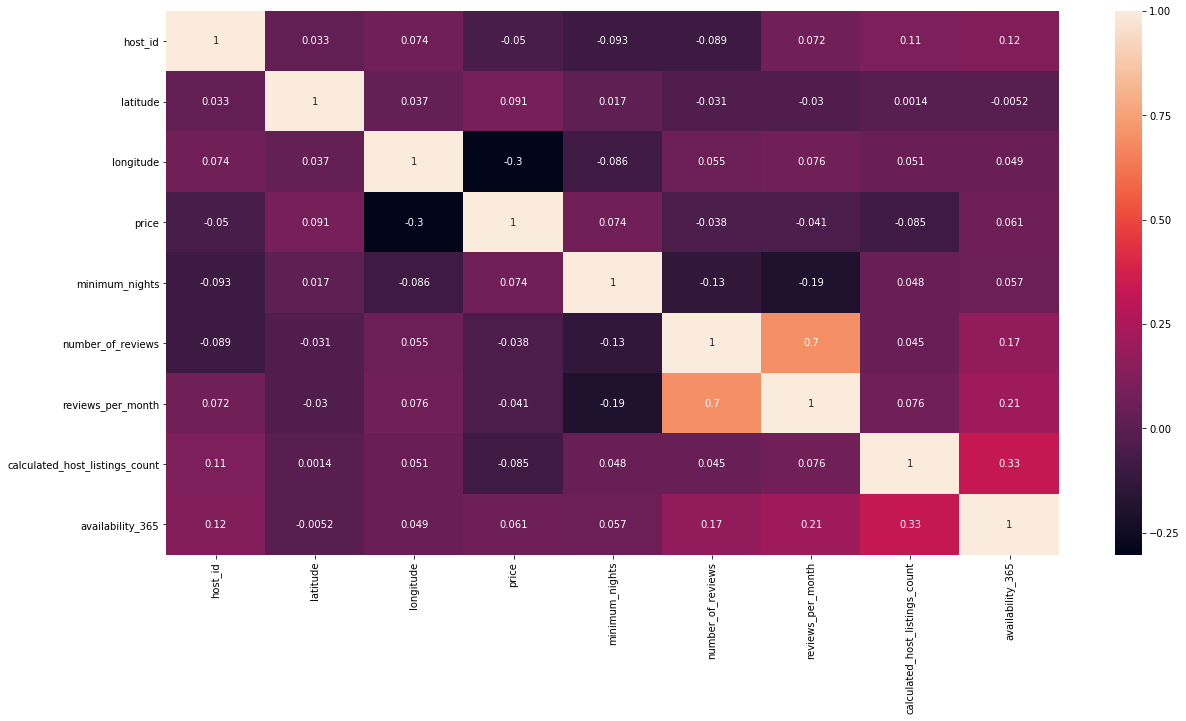

In [35]:
corr = data.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
data.columns

In [36]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

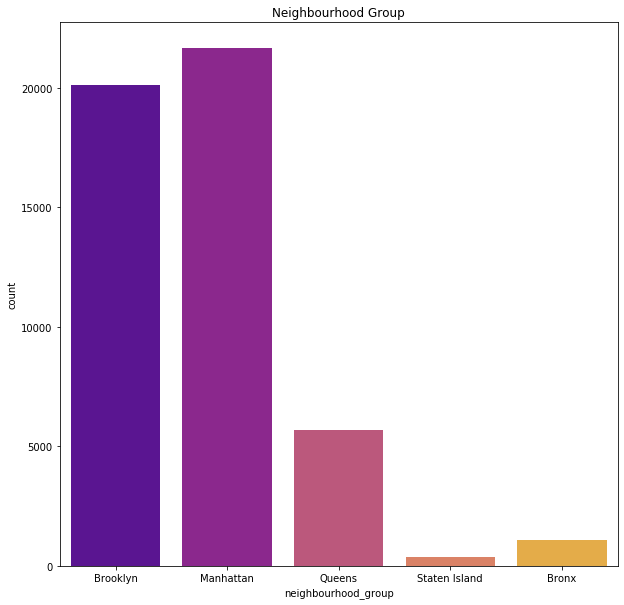

In [37]:
sns.countplot(data['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

### Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

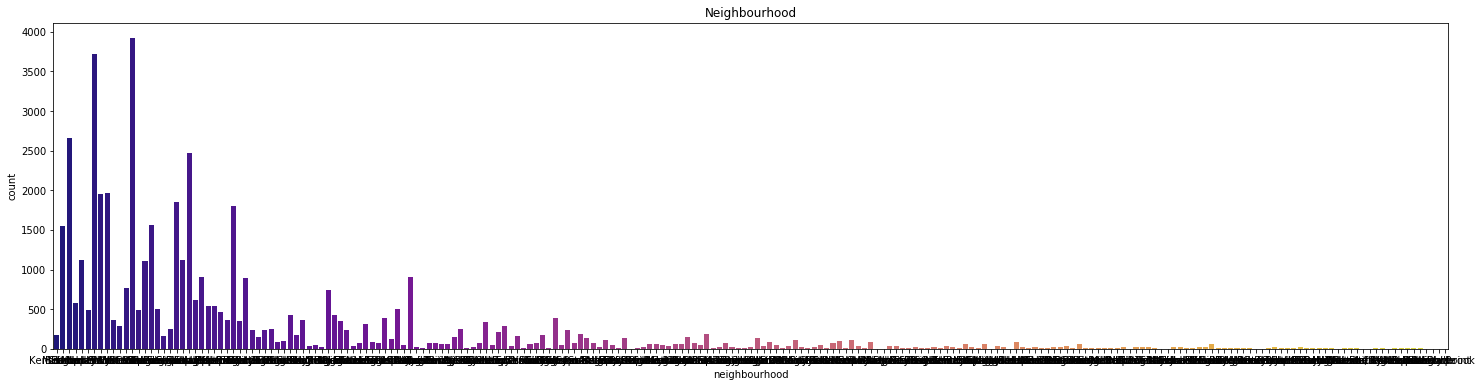

In [38]:
sns.countplot(data['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

### Room Type

Text(0.5, 1.0, 'Room Types')

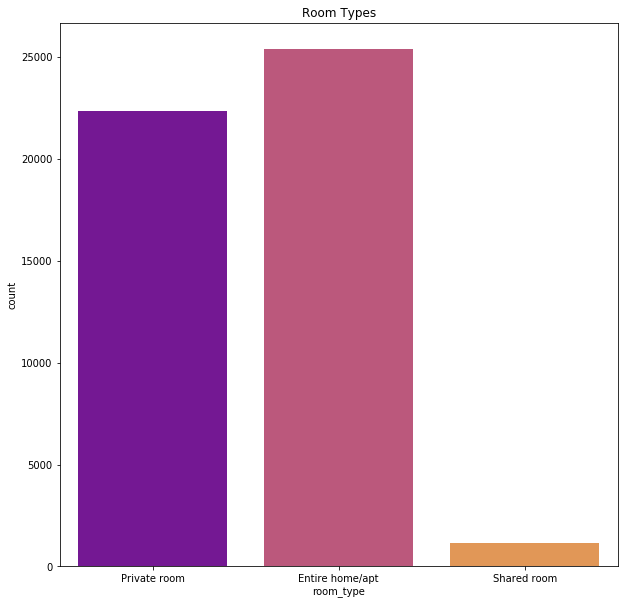

In [39]:
sns.countplot(data['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room Types')

### Relation between neighbourgroup and Availability of Room

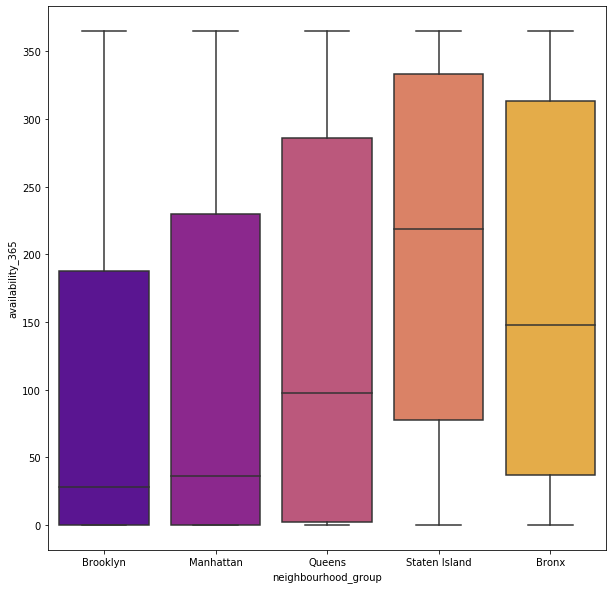

In [40]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

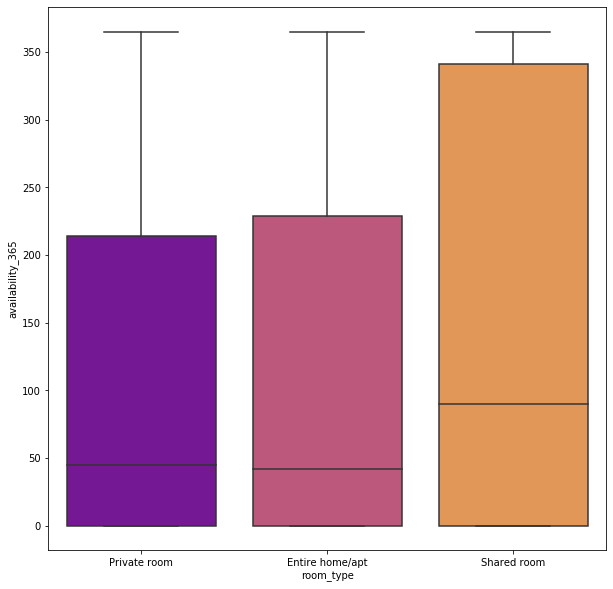

In [41]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='room_type',y='availability_365',palette='plasma')

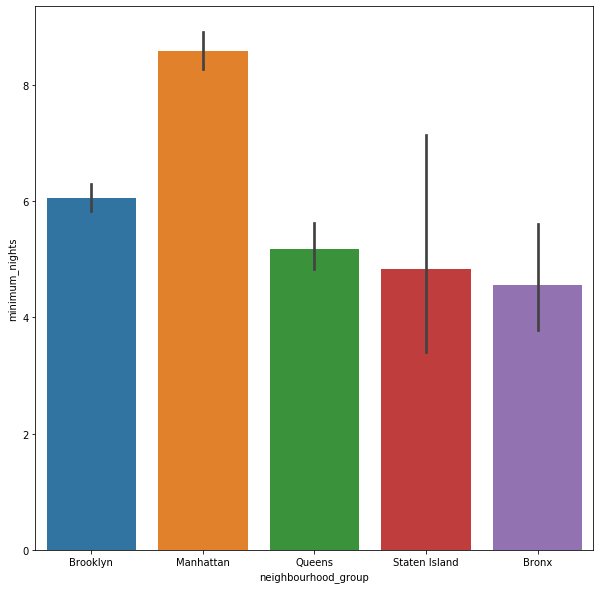

In [42]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=data, x='neighbourhood_group',y='minimum_nights')
plt.show()

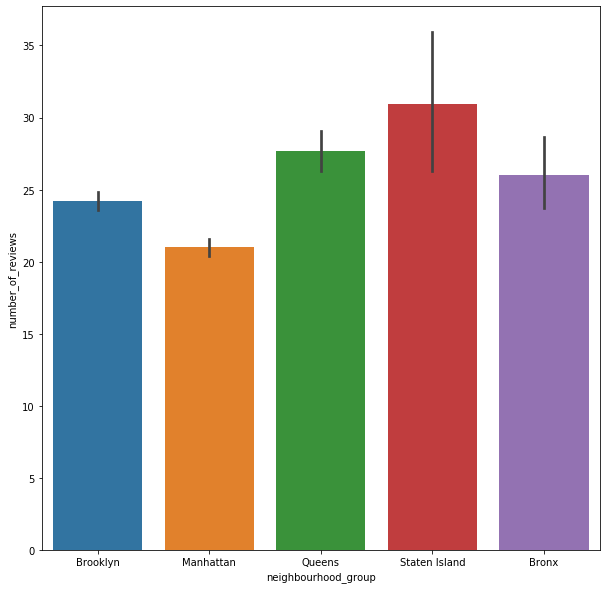

In [43]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=data, x='neighbourhood_group',y='number_of_reviews')
plt.show()

### Map of Neighbourhood group

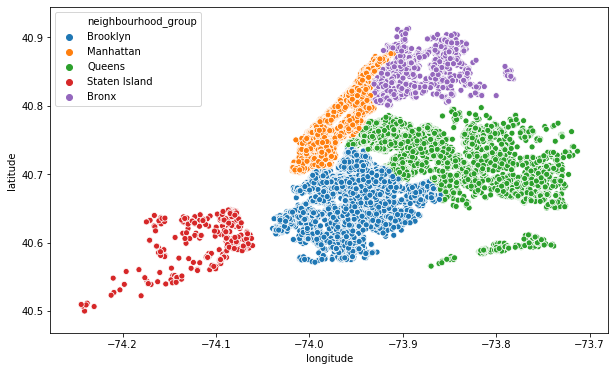

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

### Map of Neighbourhood

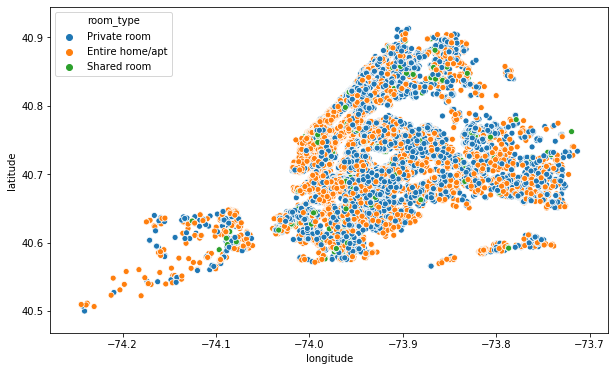

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)
plt.ioff()

### WordCloud

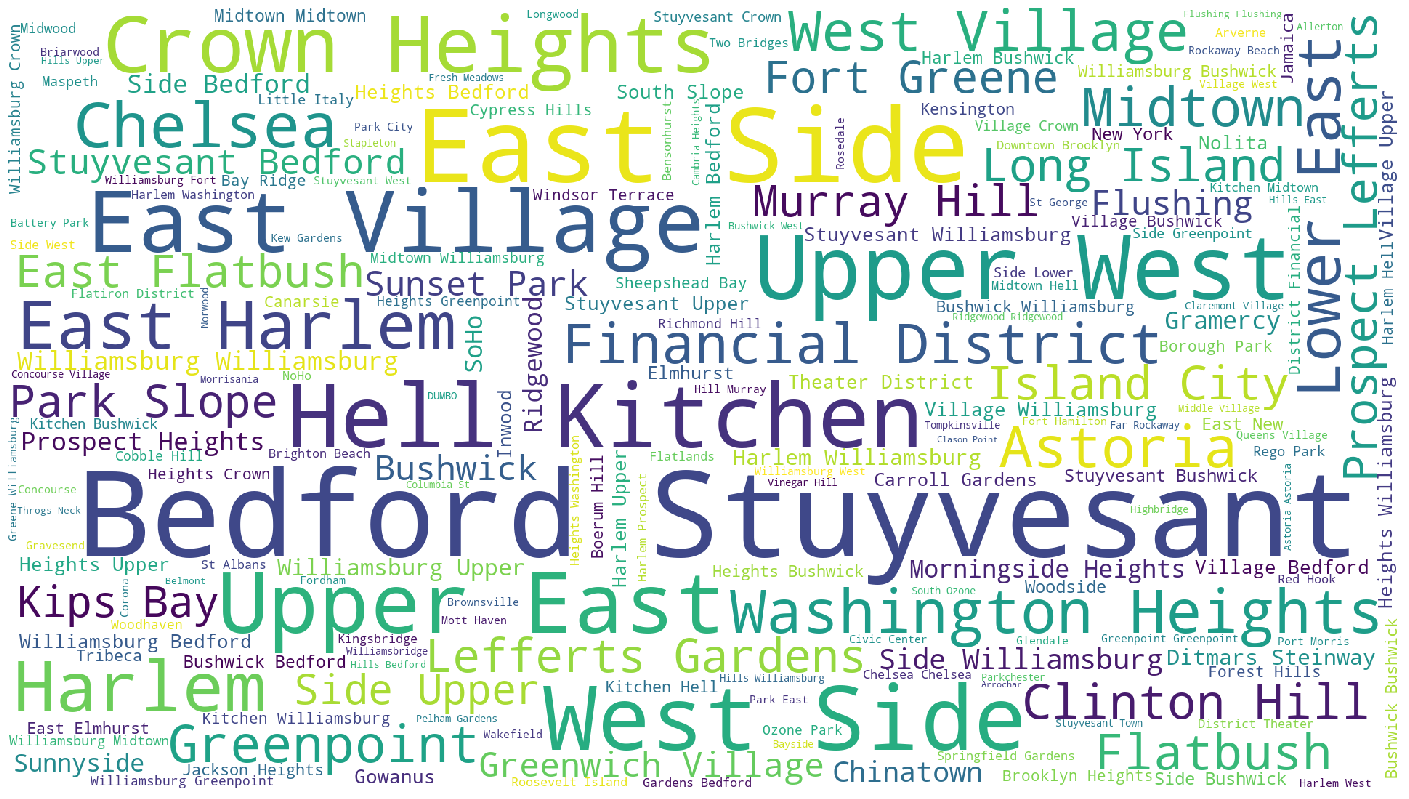

In [46]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
# plt.savefig('neighbourhood.png')
plt.show()

In [47]:
import folium
from folium import plugins
# New York coordinates
lat = 40.7128
lon = -74.0060
ny_map = folium.Map(location=[lat,lon], zoom_start=12)   # create new york map
# instantiate a marker cluster for the airbnb locations in the dataframe
airbnb =  plugins.MarkerCluster().add_to(ny_map)

# randomly select a portion of the data for plotting on the map
df_smp = data.sample(frac=0.1, replace=False, random_state=1)
latitudes = list(df_smp.latitude)
longitudes = list(df_smp.longitude)
price = list(df_smp.price)
labels = ['$'+str(x)+' per night' for x in price]  # add pop-up price to each marker on the map
# loop through the data and add markers to feature group
i = 0
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(airbnb)

ny_map

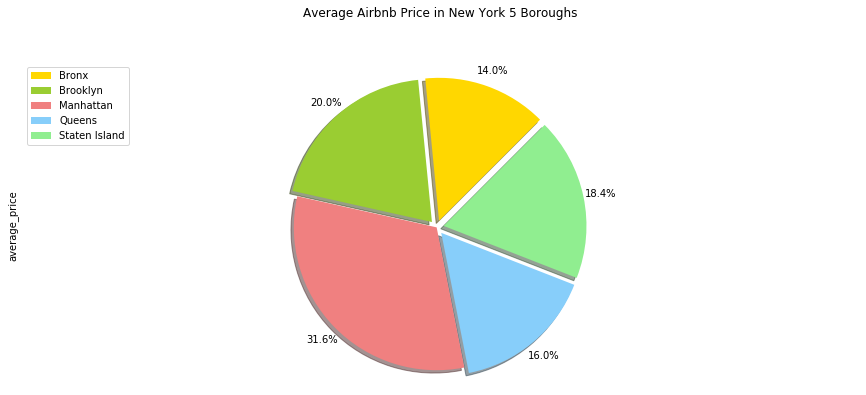

In [48]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.05, 0.05, 0, 0.05, 0.05] # ratio for each feature with which to offset each wedge.

df_grp1['average_price'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=45,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Average Airbnb Price in New York 5 Boroughs', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=df_grp1['neighbourhood_group'], loc='upper left') 

plt.show()

In [49]:
Airbnb_data=data.copy()

In [50]:
Airbnb_data.loc[Airbnb_data['room_type']=='Private room','room_type']=1
Airbnb_data.loc[Airbnb_data['room_type']=='Entire home/apt','room_type']=2
Airbnb_data.loc[Airbnb_data['room_type']=='Shared room','room_type']=3

Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Brooklyn','neighbourhood_group']=1
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Manhattan','neighbourhood_group']=2
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Bronx','neighbourhood_group']=3
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Queens','neighbourhood_group']=4
Airbnb_data.loc[Airbnb_data['neighbourhood_group']=='Staten Island','neighbourhood_group']=5


Text(0.5, 1.0, 'Price Distribution Plot')

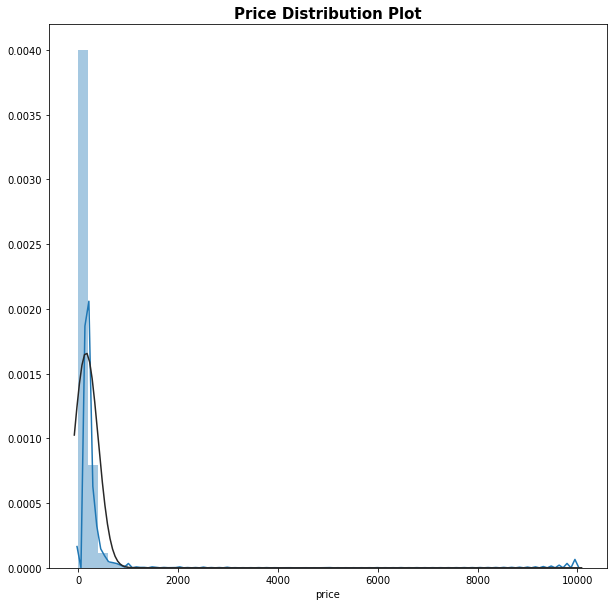

In [51]:
from scipy.stats import norm
from scipy import stats
plt.figure(figsize=(10,10))
sns.distplot(Airbnb_data['price'],fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [52]:
Airbnb_data['price_log'] = np.log(Airbnb_data.price+1)

Text(0.5, 1.0, 'Log-Price Distribution Plot')

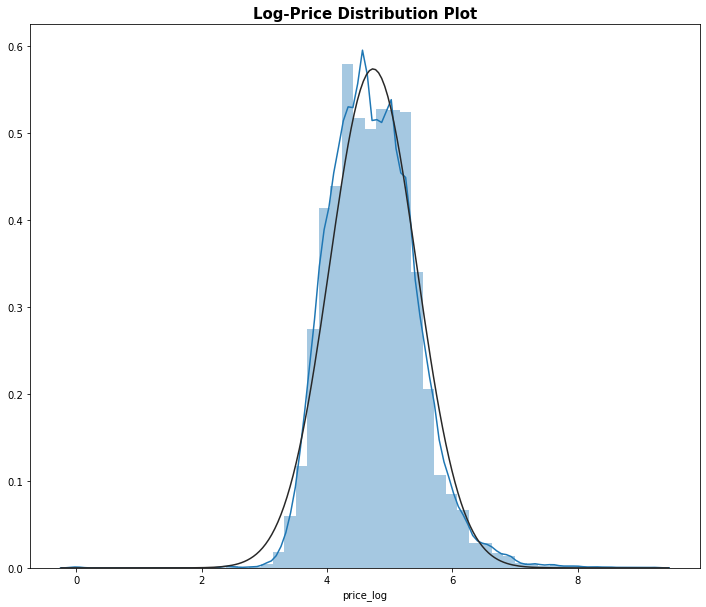

In [53]:
plt.figure(figsize=(12,10))
sns.distplot(Airbnb_data['price_log'],fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [54]:
Airbnb_data.head()

host_id  neighbourhood_group neighbourhood  latitude  longitude  room_type  \
0     2787                    1    Kensington  40.64749  -73.97237          1   
1     2845                    2       Midtown  40.75362  -73.98377          2   
2     4632                    2        Harlem  40.80902  -73.94190          1   
3     4869                    1  Clinton Hill  40.68514  -73.95976          2   
4     7192                    2   East Harlem  40.79851  -73.94399          2   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  price_log  
0                               6               365   5.010635  
1                               2               355   5.420535  
2                               1               365   5.017280  
3                               1               194   4.499810  
4                               1                 0   4.394449

In [55]:
Airbnb_data.drop(['host_id','latitude','longitude','number_of_reviews','reviews_per_month','price'], axis=1, inplace=True)

In [56]:
Airbnb_data.head()

neighbourhood_group neighbourhood  room_type  minimum_nights  \
0                    1    Kensington          1               1   
1                    2       Midtown          2               1   
2                    2        Harlem          1               3   
3                    1  Clinton Hill          2               1   
4                    2   East Harlem          2              10   

   calculated_host_listings_count  availability_365  price_log  
0                               6               365   5.010635  
1                               2               355   5.420535  
2                               1               365   5.017280  
3                               1               194   4.499810  
4                               1                 0   4.394449

In [57]:
labels_ordered=Airbnb_data.groupby(['neighbourhood'])['price_log'].mean().sort_values().index
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
Airbnb_data['neighbourhood']=Airbnb_data['neighbourhood'].map(labels_ordered)

In [58]:
Airbnb_data.head()

neighbourhood_group  neighbourhood  room_type  minimum_nights  \
0                    1             88          1               1   
1                    2            212          2               1   
2                    2            139          1               3   
3                    1            167          2               1   
4                    2            148          2              10   

   calculated_host_listings_count  availability_365  price_log  
0                               6               365   5.010635  
1                               2               355   5.420535  
2                               1               365   5.017280  
3                               1               194   4.499810  
4                               1                 0   4.394449

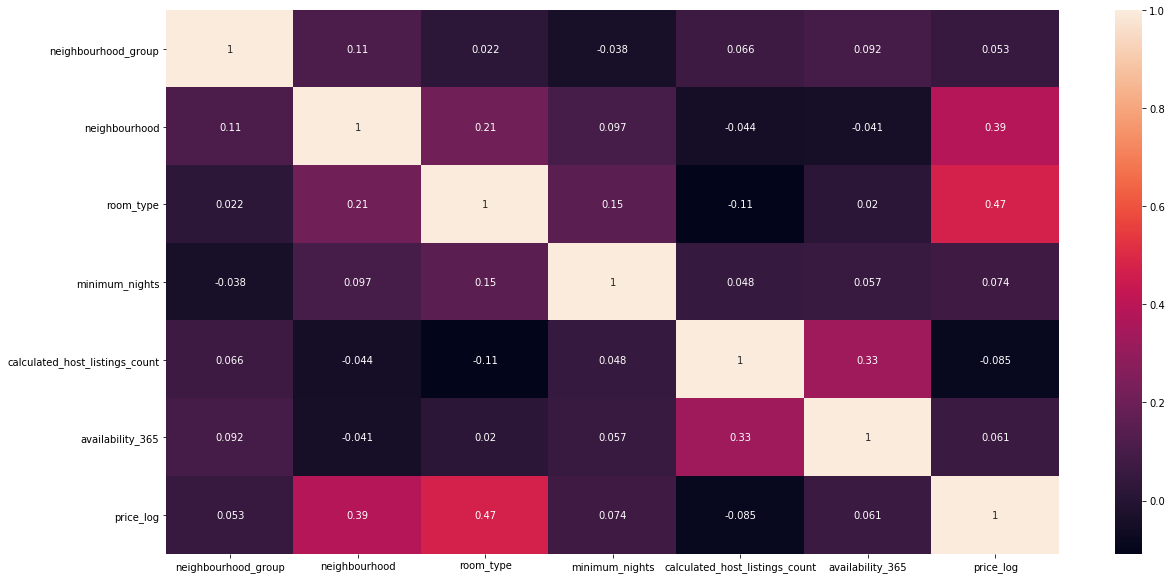

In [59]:
corr = Airbnb_data.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [60]:
y=Airbnb_data['price_log']
x=Airbnb_data.drop(['price_log'],axis=1)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

R-squared train score: 0.394
R-squared test score: 0.410
R-squared test score: 0.410


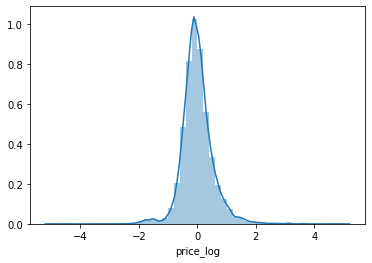

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
Y_lr=(linreg.predict(x_test))
score_logreg = linreg.score(x_test,y_test)
# plt.scatter(x_test, pd.DataFrame(y_test),  color='black')
# plt.plot(x_test, y_test, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()
# mse=cross_val_score(linreg,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
# mean_mse=np.mean(mse)
# print(mean_mse)
print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))
print('R-squared test score: {:.3f}'.format(r2_score(y_test, Y_lr)))

sns.distplot(y_test-Y_lr)

R-squared train score: -0.292
R-squared test score: -0.288
R-squared test score: 0.410


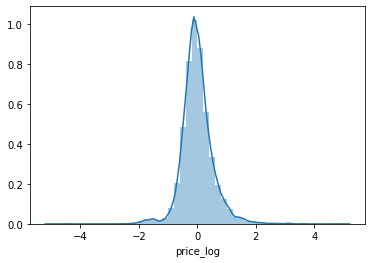

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(x_train, y_train)

y_ridge=ridge_reg.predict(x_test)
# score_ridge = ridge.score(x_test,y_test)

print('R-squared train score: {:.3f}'.format(ridge_reg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge_reg.score(x_test, y_test)))
print('R-squared test score: {:.3f}'.format(r2_score(y_test,y_ridge)))
sns.distplot(y_test-y_ridge)

R-squared score (training): 0.169
R-squared score (test): 0.170
R-squared test score: 0.170


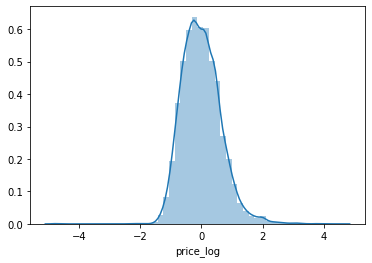

In [64]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)
score_lasso = lasso.score(x_test,y_test)
y_lasso=lasso.predict(x_test)
print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))
print('R-squared test score: {:.3f}'.format(r2_score(y_test, y_lasso)))
sns.distplot(y_test-y_lasso)

R-squared score (training): 0.716
R-squared score (test): 0.500


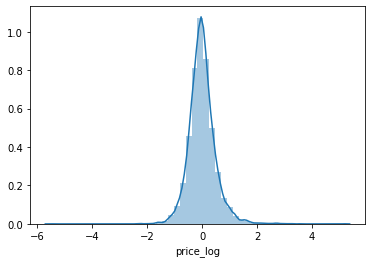

In [65]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_Dtree=DTree.predict(x_test)
print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))
sns.distplot(y_test-y_Dtree)

In [66]:
# from sklearn.ensemble import RandomForestClassifier

# regressor = RandomForestClassifier()
# regressor.fit(x_train, y_train)

# print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
# print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))

In [ ]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [ ]:
# import xgboost
# classifier=xgboost.XGBClassifier()
# random_serach=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# random_serach.fit(x_train,y_train)

# print('R-squared score (training): {:.3f}'.format(random_serach.score(x_train, y_train)))
# print('R-squared score (test): {:.3f}'.format(random_serach.score(x_test, y_test)))

In [ ]:
scaling_feature=[feature for feature in Airbnb_data.columns if feature not in ['price_log','neighbourhood_group','room_type']]
len(scaling_feature)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Airbnb_data[scaling_feature])

In [ ]:
scaler.transform(Airbnb_data[scaling_feature])

In [ ]:
scale_data = pd.concat([Airbnb_data[['price_log','neighbourhood_group','room_type']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(Airbnb_data[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [ ]:
scale_data.head()

In [ ]:
Y=scale_data['price_log']

In [ ]:
X=scale_data.drop(['price_log'],axis=1)

In [ ]:
# from sklearn.cluster import KMeans
# wcss=[]
# for i in range(1,11):
#     kmeans= KMeans(n_clusters=i,init='k-means++',random_state=30)
#     kmeans.fit(x)
#     wcss.append(kmeans.inertia_)
    
# plt.plot(range(1,11),wcss)
# plt.title("Elbow Method")
# plt.xlabel("No of cluster")
# plt.ylabel("wcss")
# plt.show()

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train.head()

In [ ]:
Y_test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred=(linreg.predict(X_test))
# score_logreg = linreg.score(X_test,Y_test)
# plt.scatter(X_test, Y_test,  color='black')
# plt.plot(X_test, Y_test, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()
# mse=cross_val_score(linreg,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
# mean_mse=np.mean(mse)
# print(mean_mse)
print('R-squared train score: {:.3f}'.format(linreg.score(X_train, Y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(X_test, Y_test)))

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)

y_pred=ridge.predict(X_test)
score_ridge = ridge.score(X_test,Y_test)

print('R-squared train score: {:.3f}'.format(ridge.score(X_train, Y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(X_test, Y_test)))
# print('Accuracy score of linear Regression is {}'.formatscore_ridge)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(X_train, Y_train)
score_lasso = lasso.score(X_test,Y_test)
print('R-squared score (training): {:.3f}'.format(lasso.score(X_train, Y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(X_test, Y_test)))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,Y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(X_train, Y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(X_test, Y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(X_train, Y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(X_train, Y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, Y_test)))